In [8]:
DATASET_PATH = "cricket_dataset/"

In [9]:
import os

In [10]:
for player in os.listdir(DATASET_PATH):
    player_path = os.path.join(DATASET_PATH, player)
    if os.path.isdir(player_path):
        count = len(os.listdir(player_path))
        print(player, ":", count)

andre_russell : 17
hardik_pandya : 12
joe_root : 14
kuldeep_yadav : 20
marcus_stoinis : 16
ms_dhoni : 14
pat_cummins : 16
rohit_sharma : 11
steve_smith : 12
trent_boult : 14
vijay_shankar : 17
virat_kohli : 18


In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (224, 224)
BATCH_SIZE = 16

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,

    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

C:\Users\SB\Desktop\Project\tf-env\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [12]:
train_data = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

Found 150 images belonging to 12 classes.


In [13]:
val_data = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 31 images belonging to 12 classes.


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),

    Dense(12, activation='softmax')
])

C:\Users\SB\Desktop\Project\tf-env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 12)                  │           1,548 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,170,508 (42.61 MB)

 Trainable params: 11,170,508 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
EPOCHS = 20

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=EPOCHS
)

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 427ms/step - accuracy: 0.4000 - loss: 1.6283 - val_accuracy: 0.1613 - val_loss: 2.3677
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 401ms/step - accuracy: 0.3867 - loss: 1.7561 - val_accuracy: 0.0968 - val_loss: 2.7051
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 399ms/step - accuracy: 0.3733 - loss: 1.6224 - val_accuracy: 0.1290 - val_loss: 2.5474
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 400ms/step - accuracy: 0.3867 - loss: 1.7562 - val_accuracy: 0.0645 - val_loss: 2.6379
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 436ms/step - accuracy: 0.4467 - loss: 1.6359 - val_accuracy: 0.1613 - val_loss: 2.6502
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 395ms/step - accuracy: 0.3800 - loss: 1.6418 - val_accuracy: 0.2258 - val_loss: 2.2250
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 398ms/step - accuracy: 0.3667 - loss: 1.7437 - val_accuracy: 0.1290 - val_loss: 2.8859
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 426ms/step - accuracy: 0.4600 - loss: 1.6395 - val_accuracy: 0.

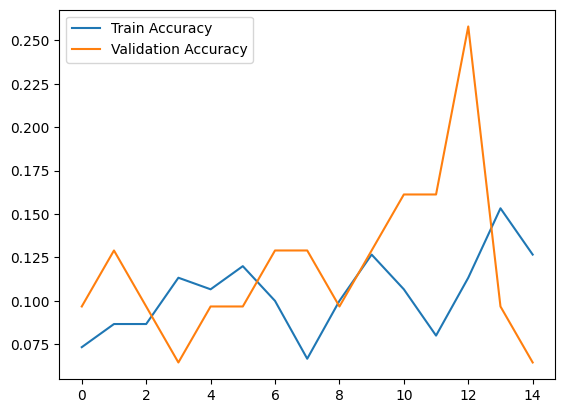

In [20]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

In [33]:
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]

print("Final Train Accuracy:", round(final_train_acc*100, 2), "%")
print("Final Validation Accuracy:", round(final_val_acc*100, 2), "%")

Final Train Accuracy: 44.0 %
Final Validation Accuracy: 19.35 %


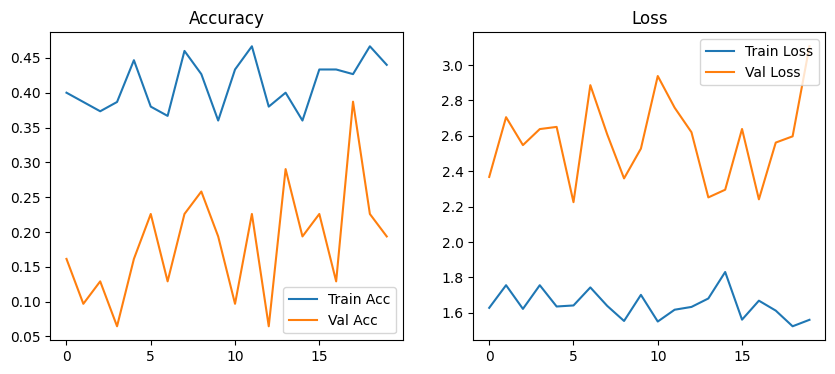

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


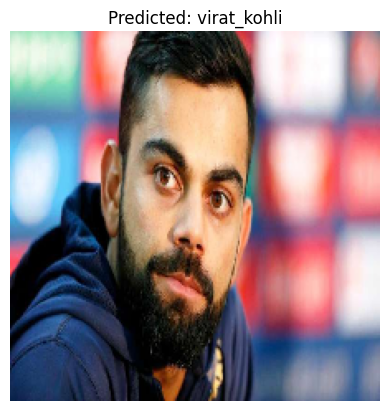

Predicted Player: virat_kohli
Confidence: 25.61 %


In [38]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

img_path = "cricket_dataset/virat_kohli/5c85eff4e2.jpg"   # yahan apni image ka naam

# Load & preprocess image
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
pred = model.predict(img_array)
pred_index = np.argmax(pred)

class_names = list(train_data.class_indices.keys())
predicted_player = class_names[pred_index]

# Show result
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted: {predicted_player}")
plt.show()

print("Predicted Player:", predicted_player)
print("Confidence:", round(np.max(pred)*100, 2), "%")